In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from outlier import outlier_detection,multi_outlier
from missing_value import missingValue_Treat

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [19]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [20]:
train.columns = train.columns.str.replace(' ', '_')

In [21]:
test.columns = test.columns.str.replace(' ', '_')

In [22]:
train.shape,test.shape

((318438, 18), (137057, 17))

In [23]:
x=train[~train.iloc[:,1:].duplicated(keep='first')]

In [24]:
x.shape

(318373, 18)

In [25]:
t=train[train.case_id.isin(x[x.iloc[:,1:-1].duplicated(keep=False)].case_id)]

In [26]:
t

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
42860,42861,28,b,11,X,3,gynecology,R,F,2.0,17816,1.0,Trauma,Moderate,2,51-60,4673.0,11-20
42861,42862,28,b,11,X,3,gynecology,R,F,2.0,17816,1.0,Trauma,Moderate,2,51-60,4673.0,21-30
63948,63949,4,a,4,X,2,gynecology,R,F,4.0,81761,1.0,Urgent,Moderate,2,51-60,5057.0,21-30
63949,63950,4,a,4,X,2,gynecology,R,F,4.0,81761,1.0,Urgent,Moderate,2,51-60,5057.0,11-20


In [27]:
train=train[~train.case_id.isin(x[x.iloc[:,1:-1].duplicated(keep=False)].case_id)]

In [28]:
train.shape

(318434, 18)

## Data Discripancy

In [29]:
train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available_Extra_Rooms_in_Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity_of_Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [30]:
test.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available_Extra_Rooms_in_Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity_of_Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                    float64
dtype: object

#### Missing Values

In [33]:
train.isna().sum()/train.shape[0]

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available_Extra_Rooms_in_Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed_Grade                            0.000355
patientid                            0.000000
City_Code_Patient                    0.014232
Type_of_Admission                    0.000000
Severity_of_Illness                  0.000000
Visitors_with_Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

In [34]:
test.isna().sum()/test.shape[0]

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available_Extra_Rooms_in_Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed_Grade                            0.000255
patientid                            0.000000
City_Code_Patient                    0.015738
Type_of_Admission                    0.000000
Severity_of_Illness                  0.000000
Visitors_with_Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
dtype: float64

#### Data Quality Check

In [35]:
train['Hospital_type_code'].value_counts()/train.shape[0]

a    0.450401
b    0.216510
c    0.144231
e    0.077787
d    0.064029
f    0.033611
g    0.013431
Name: Hospital_type_code, dtype: float64

In [36]:
test['Hospital_type_code'].value_counts()/test.shape[0]

a    0.447296
b    0.218435
c    0.147523
e    0.077763
d    0.063178
f    0.033191
g    0.012615
Name: Hospital_type_code, dtype: float64

In [37]:

train['City_Code_Hospital'].value_counts()/train.shape[0]

1     0.173823
2     0.162699
6     0.147569
7     0.111367
3     0.099138
5     0.097681
9     0.082519
11    0.053810
4     0.043510
10    0.016484
13    0.011400
Name: City_Code_Hospital, dtype: float64

In [38]:
test['City_Code_Hospital'].value_counts()/test.shape[0]

1     0.172972
2     0.164187
6     0.149208
7     0.108101
3     0.101965
5     0.096967
9     0.081360
11    0.054248
4     0.043201
10    0.016132
13    0.011659
Name: City_Code_Hospital, dtype: float64

In [39]:
train['Hospital_region_code'].value_counts()/train.shape[0]

X    0.418712
Y    0.384469
Z    0.196819
Name: Hospital_region_code, dtype: float64

In [40]:
test['Hospital_region_code'].value_counts()/test.shape[0]

X    0.419628
Y    0.381440
Z    0.198932
Name: Hospital_region_code, dtype: float64

In [41]:
train['Available_Extra_Rooms_in_Hospital'].value_counts()/train.shape[0]

2     0.308726
4     0.288000
3     0.287400
5     0.060571
6     0.024451
1     0.017530
7     0.009032
8     0.003225
9     0.000685
10    0.000210
11    0.000053
0     0.000047
12    0.000041
21    0.000009
13    0.000006
20    0.000006
14    0.000003
24    0.000003
Name: Available_Extra_Rooms_in_Hospital, dtype: float64

In [42]:
test['Available_Extra_Rooms_in_Hospital'].value_counts()/test.shape[0]

2     0.310703
4     0.288070
3     0.286268
5     0.060661
6     0.023472
1     0.017526
7     0.008982
8     0.003218
9     0.000795
10    0.000161
0     0.000051
11    0.000051
12    0.000029
13    0.000007
21    0.000007
Name: Available_Extra_Rooms_in_Hospital, dtype: float64

In [64]:
trian_index=train['Available_Extra_Rooms_in_Hospital'].value_counts().index.values
test_index=test['Available_Extra_Rooms_in_Hospital'].value_counts().index.values
exclusive_index=[]
for i in trian_index:
    if i not in test_index:
        exclusive_index.append(i)
print("Missing Categories for Available Extra Rooms Column of Test Set : {0}".format(exclusive_index))        

Missing Categories for Available Extra Rooms Column of Test Set : [20, 14, 24]


In [50]:
train['Department'].value_counts()/train.shape[0]

gynecology            0.783465
anesthesia            0.093109
radiotherapy          0.089551
TB & Chest disease    0.030104
surgery               0.003772
Name: Department, dtype: float64

In [51]:
test['Department'].value_counts()/test.shape[0]

gynecology            0.782171
anesthesia            0.092728
radiotherapy          0.091327
TB & Chest disease    0.030389
surgery               0.003385
Name: Department, dtype: float64

In [52]:
train['Ward_Type'].value_counts()/train.shape[0]

R    0.401788
Q    0.333397
S    0.244302
P    0.015846
T    0.004638
U    0.000028
Name: Ward_Type, dtype: float64

In [53]:
test['Ward_Type'].value_counts()/test.shape[0]

R    0.401235
Q    0.334759
S    0.243490
P    0.015709
T    0.004786
U    0.000022
Name: Ward_Type, dtype: float64

In [54]:
train['Ward_Facility_Code'].value_counts()/train.shape[0]

F    0.354073
E    0.173823
D    0.162699
C    0.111367
B    0.110403
A    0.087635
Name: Ward_Facility_Code, dtype: float64

In [55]:
test['Ward_Facility_Code'].value_counts()/test.shape[0]

F    0.355451
E    0.172972
D    0.164187
B    0.109152
C    0.108101
A    0.090138
Name: Ward_Facility_Code, dtype: float64

In [56]:
train['Bed_Grade'].value_counts()/train.shape[0]

2.0    0.388366
3.0    0.347271
4.0    0.180772
1.0    0.083235
Name: Bed_Grade, dtype: float64

In [57]:
test['Bed_Grade'].value_counts()/test.shape[0]

2.0    0.385095
3.0    0.352839
4.0    0.181100
1.0    0.080711
Name: Bed_Grade, dtype: float64

In [62]:
train['City_Code_Patient'].value_counts()/train.shape[0]

8.0     0.389440
2.0     0.122063
1.0     0.082821
7.0     0.074763
5.0     0.063055
4.0     0.048299
9.0     0.037041
15.0    0.028106
10.0    0.025669
6.0     0.018858
12.0    0.017734
3.0     0.011845
23.0    0.011613
14.0    0.009192
16.0    0.007078
13.0    0.005103
21.0    0.005031
20.0    0.004425
18.0    0.004409
19.0    0.003228
26.0    0.003213
25.0    0.002506
27.0    0.002421
11.0    0.002066
28.0    0.001636
22.0    0.001272
24.0    0.001131
30.0    0.000418
29.0    0.000308
33.0    0.000245
31.0    0.000185
37.0    0.000179
32.0    0.000163
34.0    0.000144
35.0    0.000050
36.0    0.000038
38.0    0.000019
Name: City_Code_Patient, dtype: float64

In [63]:
test['City_Code_Patient'].value_counts()/test.shape[0]

8.0     0.385343
2.0     0.122664
1.0     0.083141
7.0     0.074064
5.0     0.064929
4.0     0.048622
9.0     0.035730
15.0    0.028120
10.0    0.026522
6.0     0.019831
12.0    0.018073
3.0     0.011886
23.0    0.011834
14.0    0.009419
16.0    0.006807
21.0    0.005078
18.0    0.004422
13.0    0.004400
20.0    0.003845
26.0    0.003641
19.0    0.003137
25.0    0.002721
11.0    0.002006
27.0    0.001904
28.0    0.001408
24.0    0.001124
22.0    0.000941
29.0    0.000686
30.0    0.000445
34.0    0.000365
32.0    0.000314
33.0    0.000314
37.0    0.000153
36.0    0.000124
35.0    0.000102
38.0    0.000088
31.0    0.000058
Name: City_Code_Patient, dtype: float64

In [65]:
trian_index=train['City_Code_Patient'].value_counts().index.values
test_index=test['City_Code_Patient'].value_counts().index.values
exclusive_index=[]
for i in trian_index:
    if i not in test_index:
        exclusive_index.append(i)
print("Missing Categories for City Code Column of Test Set : {0}".format(exclusive_index))        

Missing Categories for City Code Column of Test Set : []


In [66]:
train['Type_of_Admission'].value_counts()/train.shape[0]

Trauma       0.478149
Emergency    0.369546
Urgent       0.152305
Name: Type_of_Admission, dtype: float64

In [67]:
test['Type_of_Admission'].value_counts()/test.shape[0]

Trauma       0.477254
Emergency    0.369824
Urgent       0.152922
Name: Type_of_Admission, dtype: float64

In [68]:
train['Severity_of_Illness'].value_counts()/train.shape[0]

Moderate    0.552199
Minor       0.269670
Extreme     0.178131
Name: Severity_of_Illness, dtype: float64

In [69]:
test['Severity_of_Illness'].value_counts()/test.shape[0]

Moderate    0.552485
Minor       0.268961
Extreme     0.178553
Name: Severity_of_Illness, dtype: float64

In [72]:
train['Age'].value_counts()/train.shape[0]

41-50     0.200195
31-40     0.199850
51-60     0.152339
21-30     0.128262
71-80     0.112400
61-70     0.105790
11-20     0.052658
81-90     0.024778
0-10      0.019640
91-100    0.004089
Name: Age, dtype: float64

In [73]:
test['Age'].value_counts()/test.shape[0]

41-50     0.202441
31-40     0.195400
51-60     0.153163
21-30     0.129267
71-80     0.109042
61-70     0.108947
11-20     0.051825
81-90     0.024442
0-10      0.021057
91-100    0.004414
Name: Age, dtype: float64

<AxesSubplot:>

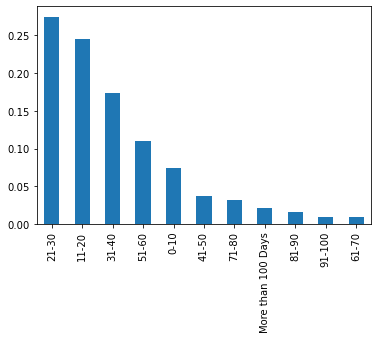

In [77]:
(train['Stay'].value_counts()/train.shape[0]).plot(kind='bar')

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

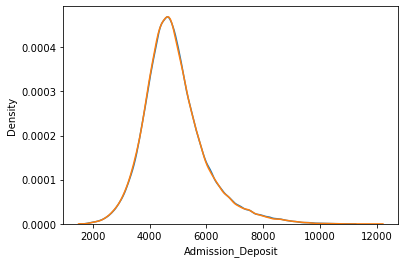

In [81]:
sns.distplot(train['Admission_Deposit'],hist=False,label="Train")
sns.distplot(test['Admission_Deposit'],hist=False,label="Test")

<AxesSubplot:xlabel='Visitors_with_Patient', ylabel='Density'>

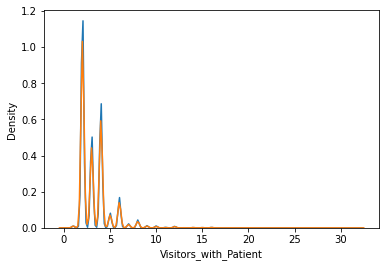

In [82]:

sns.distplot(train['Visitors_with_Patient'],hist=False,label="Train")
sns.distplot(test['Visitors_with_Patient'],hist=False,label="Test")

#### Outliers

<AxesSubplot:xlabel='Visitors_with_Patient'>

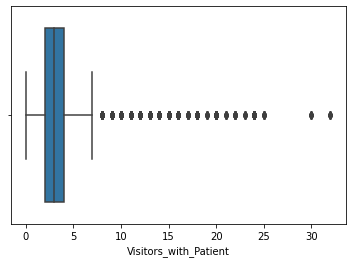

In [83]:
sns.boxplot(train['Visitors_with_Patient'])

<AxesSubplot:xlabel='Visitors_with_Patient'>

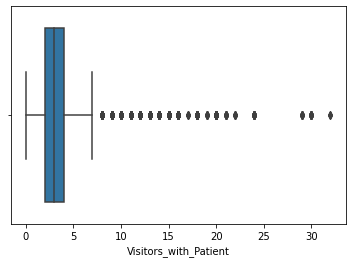

In [84]:
sns.boxplot(test['Visitors_with_Patient'])

<AxesSubplot:xlabel='Admission_Deposit'>

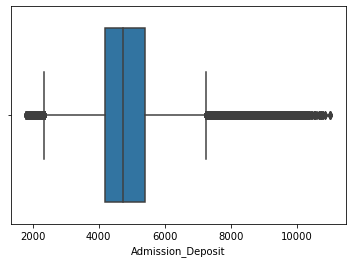

In [85]:
sns.boxplot(train['Admission_Deposit'])


<AxesSubplot:xlabel='Admission_Deposit'>

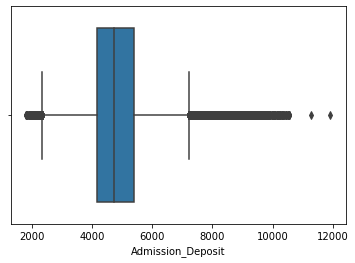

In [86]:
sns.boxplot(test['Admission_Deposit'])

In [88]:
outlier_detection(df=train,col='Admission_Deposit')
outlier_detection(df=test,col='Admission_Deposit')

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

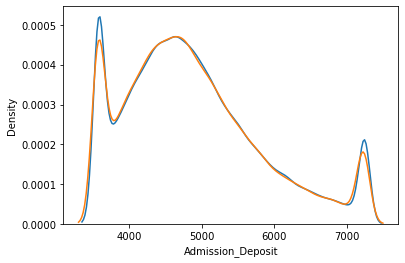

In [90]:
sns.distplot(train['Admission_Deposit'],hist=False,label="Train")
sns.distplot(test['Admission_Deposit'],hist=False,label="Test")

In [91]:
outlier_detection(df=train,col='Visitors_with_Patient')
outlier_detection(df=test,col='Visitors_with_Patient')

<AxesSubplot:xlabel='Visitors_with_Patient', ylabel='Density'>

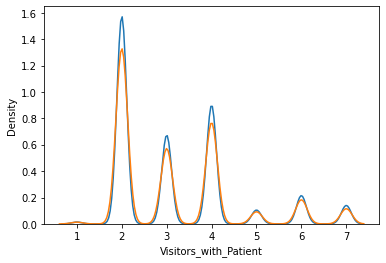

In [92]:

sns.distplot(train['Visitors_with_Patient'],hist=False,label="Train")
sns.distplot(test['Visitors_with_Patient'],hist=False,label="Test")

#### Missing Value Treatment

In [109]:
missingValue_Treat(df=train,col='Bed_Grade')
missingValue_Treat(df=test,col='Bed_Grade')

In [110]:
missingValue_Treat(df=train,col='City_Code_Patient')
missingValue_Treat(df=test,col='City_Code_Patient')

In [111]:
train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [112]:
test.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

## Insights

In [124]:
pd.crosstab(train['Hospital_type_code'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Hospital_type_code,,,,,,,,,,,
a,0.033159,0.125005,0.126510,0.075287,0.012910,0.045903,0.002902,0.011688,0.005935,0.003021,0.008080
b,0.016157,0.043752,0.061363,0.038893,0.012225,0.021697,0.002880,0.008190,0.003222,0.002459,0.005672
c,0.011268,0.032402,0.039336,0.025820,0.005879,0.016255,0.001350,0.005059,0.002277,0.001379,0.003206
d,0.004126,0.013890,0.017357,0.011638,0.002387,0.008520,0.000584,0.002390,0.001322,0.000565,0.001250
e,0.005668,0.020865,0.020488,0.012750,0.002399,0.008894,0.000619,0.002588,0.001240,0.000685,0.001592
f,0.003213,0.007323,0.005957,0.006573,0.000641,0.006155,0.000138,0.001514,0.000798,0.000433,0.000867
g,0.000534,0.002142,0.003737,0.002258,0.000437,0.002547,0.000144,0.000773,0.000399,0.000141,0.000320


In [175]:
pd.crosstab(train['City_Code_Hospital'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
City_Code_Hospital,,,,,,,,,,,
1,0.010947,0.047360,0.051367,0.028938,0.005351,0.017611,0.001291,0.004745,0.002308,0.001212,0.002691
2,0.012307,0.030914,0.047416,0.029212,0.010523,0.014882,0.002500,0.006177,0.002424,0.001799,0.004544
3,0.008162,0.022114,0.027466,0.017617,0.004167,0.010856,0.000889,0.003348,0.001407,0.000989,0.002123
4,0.003037,0.009936,0.011082,0.007860,0.001564,0.005668,0.000437,0.001749,0.000716,0.000568,0.000892
5,0.007578,0.023320,0.026323,0.016974,0.003062,0.011981,0.000832,0.003228,0.001696,0.000738,0.001950
6,0.007744,0.036271,0.045344,0.025214,0.005216,0.016141,0.001071,0.004340,0.002176,0.001162,0.002889
7,0.012313,0.037898,0.024705,0.017558,0.001869,0.010128,0.000433,0.002264,0.001256,0.000490,0.002453
9,0.006463,0.019505,0.019335,0.014895,0.002070,0.012323,0.000499,0.003131,0.001765,0.000779,0.001755
10,0.001159,0.003335,0.004192,0.002943,0.000675,0.002249,0.000182,0.000751,0.000484,0.000154,0.000361


In [179]:
pd.crosstab(train['City_Code_Hospital'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False)

City_Code_Hospital
1     0.051367
2     0.047416
6     0.045344
7     0.037898
3     0.027466
5     0.026323
9     0.019505
11    0.013946
4     0.011082
10    0.004192
13    0.003571
dtype: float64

In [180]:
pd.crosstab(train['Hospital_region_code'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Hospital_region_code,,,,,,,,,,,
X,0.025578,0.106405,0.121740,0.071695,0.013833,0.046236,0.003178,0.012847,0.005998,0.003602,0.007600
Y,0.032807,0.093539,0.099220,0.066934,0.015815,0.040897,0.003718,0.012778,0.006092,0.003354,0.009314
Z,0.015740,0.045435,0.053788,0.034591,0.007229,0.022837,0.001721,0.006576,0.003103,0.001727,0.004073


In [182]:
pd.crosstab(train['Hospital_region_code'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False)

Hospital_region_code
X    0.121740
Y    0.099220
Z    0.053788
dtype: float64

In [183]:
pd.crosstab(train['Available_Extra_Rooms_in_Hospital'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Available_Extra_Rooms_in_Hospital,,,,,,,,,,,
0,0.000000,0.000000,0.000035,0.000000,0.000006,0.000003,0.000000,0.000000,0.000000,0.000000,0.000003
1,0.001347,0.003024,0.002688,0.003344,0.000754,0.002971,0.000295,0.001068,0.000600,0.000358,0.001080
2,0.021339,0.072850,0.070341,0.055487,0.009801,0.043661,0.002654,0.013061,0.006218,0.003721,0.009594
3,0.020362,0.068052,0.077781,0.052171,0.009814,0.033966,0.002384,0.009927,0.004733,0.002393,0.005819
4,0.022956,0.074816,0.092876,0.046945,0.012207,0.022083,0.002324,0.006102,0.002694,0.001576,0.003420
5,0.004934,0.016308,0.018359,0.009776,0.002497,0.004934,0.000590,0.001413,0.000625,0.000455,0.000681
6,0.002035,0.006739,0.007851,0.003662,0.001137,0.001733,0.000254,0.000458,0.000229,0.000113,0.000239
7,0.000864,0.002537,0.003263,0.001165,0.000405,0.000446,0.000072,0.000113,0.000057,0.000022,0.000088
8,0.000232,0.000798,0.001228,0.000484,0.000207,0.000129,0.000035,0.000031,0.000025,0.000022,0.000035


In [184]:
pd.crosstab(train['Available_Extra_Rooms_in_Hospital'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False)

Available_Extra_Rooms_in_Hospital
4     0.092876
3     0.077781
2     0.072850
5     0.018359
6     0.007851
1     0.003344
7     0.003263
8     0.001228
9     0.000229
10    0.000060
0     0.000035
11    0.000016
12    0.000016
21    0.000006
13    0.000003
14    0.000003
20    0.000003
24    0.000003
dtype: float64

In [185]:
pd.crosstab(train['Department'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Department,,,,,,,,,,,
TB & Chest disease,0.002484,0.007471,0.008221,0.005505,0.000942,0.003288,0.000239,0.000923,0.000440,0.000201,0.000389
anesthesia,0.004770,0.027707,0.028106,0.015570,0.002672,0.007936,0.000543,0.002208,0.001206,0.000490,0.001900
gynecology,0.059193,0.187442,0.214742,0.136716,0.030371,0.087896,0.006990,0.025641,0.011770,0.007125,0.015579
radiotherapy,0.007471,0.021945,0.022808,0.014801,0.002760,0.010225,0.000829,0.003275,0.001658,0.000804,0.002974
surgery,0.000207,0.000813,0.000870,0.000628,0.000132,0.000625,0.000016,0.000154,0.000119,0.000063,0.000144


In [189]:
pd.crosstab(train['Department'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False).to_frame()

,0
Department,
gynecology,0.214742
anesthesia,0.028106
radiotherapy,0.022808
TB & Chest disease,0.008221
surgery,0.000870


In [190]:
pd.crosstab(train['Ward_Type'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Ward_Type,,,,,,,,,,,
P,0.001448,0.004375,0.005659,0.002340,0.000895,0.000584,0.000229,0.000166,0.000044,0.000050,0.000057
Q,0.026112,0.091711,0.109084,0.053942,0.015532,0.020434,0.003096,0.006133,0.002487,0.001448,0.003417
R,0.029237,0.099295,0.115239,0.069236,0.013406,0.043127,0.003282,0.012580,0.005314,0.003511,0.007562
S,0.016980,0.049144,0.043532,0.046782,0.006827,0.045228,0.001969,0.013146,0.007226,0.003611,0.009858
T,0.000345,0.000845,0.001225,0.000914,0.000217,0.000597,0.000041,0.000176,0.000122,0.000063,0.000094
U,0.000003,0.000009,0.000009,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [191]:
pd.crosstab(train['Ward_Type'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False).to_frame()

,0
Ward_Type,
R,0.115239
Q,0.109084
S,0.049144
P,0.005659
T,0.001225
U,0.000009


In [192]:
pd.crosstab(train['Ward_Facility_Code'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Ward_Facility_Code,,,,,,,,,,,
A,0.007480,0.019266,0.023477,0.015711,0.003762,0.009908,0.000801,0.003037,0.001281,0.000914,0.001997
B,0.008187,0.024727,0.027098,0.020164,0.003423,0.015887,0.000785,0.004337,0.002412,0.001065,0.002318
C,0.012313,0.037898,0.024705,0.017558,0.001869,0.010128,0.000433,0.002264,0.001256,0.000490,0.002453
D,0.012307,0.030914,0.047416,0.029212,0.010523,0.014882,0.002500,0.006177,0.002424,0.001799,0.004544
E,0.010947,0.047360,0.051367,0.028938,0.005351,0.017611,0.001291,0.004745,0.002308,0.001212,0.002691
F,0.022890,0.085214,0.100683,0.061636,0.011949,0.041553,0.002807,0.011641,0.005511,0.003203,0.006984


In [193]:
pd.crosstab(train['Ward_Facility_Code'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False).to_frame()

,0
Ward_Facility_Code,
F,0.100683
E,0.051367
D,0.047416
C,0.037898
B,0.027098
A,0.023477


In [194]:
pd.crosstab(train['Bed_Grade'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Bed_Grade,,,,,,,,,,,
-999.0,0.000006,0.000060,0.000116,0.000069,0.000025,0.000041,0.000013,0.000013,0.000003,0.000003,0.000006
1.0,0.007279,0.017611,0.023647,0.013855,0.003392,0.009738,0.000864,0.003159,0.001124,0.000873,0.001693
2.0,0.029183,0.080233,0.130683,0.063194,0.016060,0.043014,0.003571,0.011180,0.003894,0.002905,0.004450
3.0,0.024759,0.097596,0.080309,0.063300,0.011450,0.037301,0.002619,0.011422,0.006422,0.003175,0.008919
4.0,0.012897,0.049878,0.039993,0.032801,0.005951,0.019875,0.001551,0.006428,0.003750,0.001727,0.005920


In [195]:
pd.crosstab(train['Bed_Grade'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False).to_frame()

,0
Bed_Grade,
2.0,0.130683
3.0,0.097596
4.0,0.049878
1.0,0.023647
-999.0,0.000116


In [196]:
pd.crosstab(train['City_Code_Patient'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
City_Code_Patient,,,,,,,,,,,
-999.0,0.001105,0.003219,0.003574,0.002591,0.000609,0.001702,0.000132,0.000484,0.000239,0.000160,0.000418
1.0,0.005838,0.020544,0.024237,0.014176,0.002302,0.009622,0.000540,0.002314,0.001212,0.000609,0.001426
2.0,0.007681,0.032010,0.037317,0.020023,0.003549,0.013745,0.000625,0.002952,0.001642,0.000779,0.001740
3.0,0.000732,0.002358,0.002600,0.002208,0.000550,0.001548,0.000192,0.000587,0.000292,0.000217,0.000562
4.0,0.004497,0.012452,0.012518,0.008027,0.002101,0.005147,0.000396,0.001360,0.000675,0.000386,0.000741
5.0,0.004987,0.014392,0.015692,0.011330,0.002563,0.007650,0.000722,0.002534,0.001052,0.000619,0.001514
6.0,0.001982,0.005449,0.004472,0.003225,0.000659,0.001721,0.000160,0.000568,0.000226,0.000154,0.000242
7.0,0.005310,0.018340,0.019687,0.013293,0.002537,0.008928,0.000628,0.002406,0.001410,0.000609,0.001614
8.0,0.025958,0.090399,0.109272,0.068768,0.015457,0.042272,0.003693,0.013962,0.006171,0.003718,0.009770


In [198]:
pd.crosstab(train['City_Code_Patient'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False).to_frame().head()

,0
City_Code_Patient,
8.0,0.109272
2.0,0.037317
1.0,0.024237
7.0,0.019687
5.0,0.015692


In [199]:
pd.crosstab(train['Type_of_Admission'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Type_of_Admission,,,,,,,,,,,
Emergency,0.044650,0.099107,0.086043,0.059419,0.013017,0.037323,0.003065,0.010599,0.005364,0.002936,0.008024
Trauma,0.016732,0.105969,0.145220,0.088266,0.018742,0.057500,0.004645,0.017432,0.008002,0.004767,0.010875
Urgent,0.012744,0.040303,0.043485,0.025534,0.005119,0.015146,0.000908,0.004170,0.001828,0.000980,0.002088


In [200]:
pd.crosstab(train['Type_of_Admission'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False).to_frame().head()

,0
Type_of_Admission,
Trauma,0.145220
Emergency,0.099107
Urgent,0.043485


In [201]:
pd.crosstab(train['Severity_of_Illness'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Severity_of_Illness,,,,,,,,,,,
Extreme,0.010674,0.033030,0.048682,0.031674,0.007383,0.024423,0.002032,0.008086,0.003495,0.002528,0.006124
Minor,0.024702,0.085044,0.067628,0.045369,0.009421,0.022385,0.001630,0.006055,0.003093,0.001335,0.003008
Moderate,0.038749,0.127304,0.158438,0.096177,0.020073,0.063162,0.004956,0.018060,0.008605,0.004820,0.011855


In [202]:
pd.crosstab(train['Severity_of_Illness'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False).to_frame().head()

,0
Severity_of_Illness,
Moderate,0.158438
Minor,0.085044
Extreme,0.048682


In [204]:
pd.crosstab(train['Severity_of_Illness'],train['Type_of_Admission'])

Type_of_Admission,Emergency,Trauma,Urgent
Severity_of_Illness,,,
Extreme,19844,28837,8042
Minor,35356,36800,13716
Moderate,62476,86622,26741


In [207]:
pd.crosstab(train['Severity_of_Illness'],train['Type_of_Admission']).max(axis=1).sort_values(ascending=False).to_frame()

,0
Severity_of_Illness,
Moderate,86622
Minor,36800
Extreme,28837


In [206]:
pd.crosstab(train['Age'],train['Stay'],normalize=True)

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Age,,,,,,,,,,,
0-10,0.001931,0.006152,0.004676,0.003184,0.000587,0.001828,0.000082,0.000480,0.000264,0.000110,0.000345
11-20,0.004874,0.016779,0.013541,0.008419,0.001602,0.004488,0.000279,0.001099,0.000700,0.000223,0.000653
21-30,0.010888,0.035398,0.035781,0.021706,0.004390,0.011911,0.000826,0.003222,0.001715,0.000725,0.001699
31-40,0.015438,0.049593,0.058254,0.034268,0.007452,0.020466,0.001598,0.005675,0.002515,0.001520,0.003071
41-50,0.014845,0.046977,0.056231,0.034491,0.007873,0.022576,0.001765,0.006739,0.002779,0.001815,0.004104
51-60,0.010762,0.035624,0.041001,0.026910,0.005449,0.018023,0.001407,0.005370,0.002462,0.001567,0.003765
61-70,0.006890,0.024715,0.028367,0.018622,0.003784,0.012816,0.001021,0.003863,0.001884,0.001036,0.002792
71-80,0.006912,0.024991,0.029940,0.020161,0.004343,0.013921,0.001187,0.004293,0.002104,0.001212,0.003335
81-90,0.001325,0.004371,0.006030,0.004723,0.001190,0.003398,0.000361,0.001262,0.000678,0.000415,0.001024


In [208]:
pd.crosstab(train['Age'],train['Stay'],normalize=True).max(axis=1).sort_values(ascending=False).to_frame()

,0
Age,
31-40,0.058254
41-50,0.056231
51-60,0.041001
21-30,0.035781
71-80,0.029940
61-70,0.028367
11-20,0.016779
0-10,0.006152
81-90,0.006030


In [210]:
pd.crosstab(train['Age'],train['Stay'],train['Admission_Deposit'],aggfunc='mean')

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Age,,,,,,,,,,,
0-10,4791.414634,4972.263400,5077.090329,4884.462032,5075.641711,4858.849656,4794.538462,4788.232026,4707.607143,4822.771429,4963.750000
11-20,4747.006121,5012.097604,5074.325255,4882.648825,4981.060784,4796.731980,4856.455056,4761.232857,4671.793722,4767.676056,4769.182692
21-30,4655.741996,4920.783889,5002.070300,4841.064308,4892.862303,4717.745979,4876.051331,4695.177875,4532.865385,4631.415584,4648.428835
31-40,4600.388426,4862.891369,4953.574798,4812.919996,4836.574378,4711.296916,4840.583497,4671.524350,4588.120474,4707.221074,4630.573620
41-50,4643.048657,4870.298081,4928.471099,4816.371984,4821.651775,4716.251495,4821.422598,4678.770037,4580.022599,4776.785467,4626.247896
51-60,4672.694047,4946.234441,5015.214154,4877.897479,4877.873775,4769.985886,4782.514509,4739.652924,4685.647959,4746.394790,4731.129691
61-70,4746.576572,4991.030813,5109.687977,4961.280776,5012.667635,4810.901005,4968.166154,4791.208130,4706.485833,4838.004545,4805.035996
71-80,4716.259200,5031.092611,5147.493602,4960.236059,5086.238973,4794.345139,5056.457672,4808.479883,4570.217164,4814.235751,4700.019774
81-90,4596.488152,4940.963362,5102.067448,4948.256649,5069.534301,4662.924677,5182.534783,4748.965174,4585.127315,4766.219697,4669.969325


In [211]:
pd.crosstab(train['Age'],train['Stay'],train['Admission_Deposit'],aggfunc='mean').max(axis=1).sort_values(ascending=False).to_frame()

,0
Age,
91-100,5237.462712
81-90,5182.534783
71-80,5147.493602
61-70,5109.687977
0-10,5077.090329
11-20,5074.325255
51-60,5015.214154
21-30,5002.070300
31-40,4953.574798


In [214]:
pd.crosstab(train['Severity_of_Illness'],train['Stay'],train['Admission_Deposit'],aggfunc='mean')

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Severity_of_Illness,,,,,,,,,,,
Extreme,4594.681671,4800.808804,4891.296768,4775.948741,4805.777541,4636.410955,4800.602782,4627.609126,4496.986523,4680.417391,4658.666923
Minor,4726.935228,5014.590580,5124.170142,4940.908493,5024.094833,4840.975309,4992.382466,4798.769969,4672.837563,4841.862353,4740.938935
Moderate,4647.672623,4905.180608,5003.759395,4865.410419,4899.693601,4761.309029,4896.843473,4747.470353,4638.874635,4774.520195,4710.756556


In [215]:
pd.crosstab(train['Severity_of_Illness'],train['Stay'],train['Admission_Deposit'],aggfunc='mean').max(axis=1).sort_values(ascending=False).to_frame()

,0
Severity_of_Illness,
Minor,5124.170142
Moderate,5003.759395
Extreme,4891.296768


In [216]:
pd.crosstab(train['Type_of_Admission'],train['Stay'],train['Admission_Deposit'],aggfunc='mean')

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Type_of_Admission,,,,,,,,,,,
Emergency,4609.388838,4826.723581,4939.604785,4758.331404,4816.564536,4678.615860,4711.452869,4656.500593,4543.519028,4725.240107,4692.691585
Trauma,4747.716685,5038.215564,5086.610017,4963.538140,5018.005865,4811.543255,5040.779243,4793.658440,4665.395408,4798.447628,4722.874964
Urgent,4759.709956,4893.652057,4915.376399,4798.552269,4771.404908,4690.719884,4742.439446,4627.663027,4588.744845,4654.721154,4607.793985


In [217]:
pd.crosstab(train['Type_of_Admission'],train['Stay'],train['Admission_Deposit'],aggfunc='mean').max(axis=1).sort_values(ascending=False).to_frame()

,0
Type_of_Admission,
Trauma,5086.610017
Emergency,4939.604785
Urgent,4915.376399


In [218]:
pd.crosstab(train['City_Code_Patient'],train['Stay'],train['Admission_Deposit'],aggfunc='mean')

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
City_Code_Patient,,,,,,,,,,,
-999.0,4657.984375,4917.200976,4913.638401,4751.426667,4919.902062,4696.653137,5012.309524,4688.292208,4793.250000,4604.558824,4656.105263
1.0,4635.536041,4893.548303,4900.246502,4745.197386,4792.158936,4619.642461,4801.671512,4586.765265,4499.015544,4617.628866,4603.946035
2.0,4533.469542,4827.944766,4889.922410,4730.522663,4807.022566,4623.443454,4794.276382,4595.701064,4452.562141,4675.610887,4620.444946
3.0,4590.502146,4798.926099,4960.049517,4794.426031,4952.608571,4636.009128,4649.606557,4639.254011,4605.220430,4513.456522,4653.522346
4.0,4718.988827,5001.601135,5097.689789,4913.390063,4866.733931,4817.892923,4814.718254,4673.606236,4787.572093,4547.886179,4670.417373
5.0,4709.023300,4988.423849,5064.563338,4910.273975,4935.411765,4774.230706,4919.171739,4704.824659,4554.062687,4688.642132,4668.223029
6.0,4739.837559,5014.321614,5054.463483,4892.901655,4873.430952,4871.208942,4852.598039,4695.453039,4538.604167,5129.938776,4507.941558
7.0,4740.372561,5052.818493,5122.722204,5009.459013,4901.937500,4949.735315,4862.177500,4916.826371,4804.425390,4887.291237,4740.811284
8.0,4662.599564,4915.682641,5049.120560,4903.450384,4972.332893,4767.493983,4953.390731,4759.783626,4650.897455,4798.449747,4755.086950


In [219]:
pd.crosstab(train['City_Code_Patient'],train['Stay'],train['Admission_Deposit'],aggfunc='mean').max(axis=1).sort_values(ascending=False).to_frame().head()

,0
City_Code_Patient,
30.0,7243.5
31.0,6598.5
29.0,6302.0
11.0,5645.0
32.0,5541.0


In [222]:
pd.crosstab(train['Bed_Grade'],train['Stay'],train['Admission_Deposit'],aggfunc='mean')

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Bed_Grade,,,,,,,,,,,
-999.0,4139.750000,4465.131579,4783.986486,4603.750000,4480.187500,4558.807692,4422.750000,4454.250000,3574.500000,5226.000000,4630.000000
1.0,4527.382657,4623.890157,4773.433599,4644.393586,4635.418519,4566.212835,4702.729091,4568.774851,4400.603352,4608.330935,4601.358071
2.0,4622.027978,4838.550667,4965.118902,4853.511082,4864.153891,4759.492371,4872.773527,4752.442556,4560.042742,4764.313514,4785.641496
3.0,4723.898148,4998.310525,5099.145388,4898.030932,5018.681569,4767.379399,4944.353717,4727.030107,4663.488998,4787.683482,4685.084507
4.0,4735.465425,5047.409620,5142.025128,4937.331115,4999.482586,4786.104993,4958.258097,4761.072545,4646.674204,4764.974545,4685.962865


In [221]:
pd.crosstab(train['Bed_Grade'],train['Stay'],train['Admission_Deposit'],aggfunc='mean').max(axis=1).sort_values(ascending=False).to_frame()

,0
Bed_Grade,
-999.0,5226.000000
4.0,5142.025128
3.0,5099.145388
2.0,4965.118902
1.0,4773.433599


In [223]:
pd.crosstab(train['Ward_Facility_Code'],train['Stay'],train['Admission_Deposit'],aggfunc='mean')

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Ward_Facility_Code,,,,,,,,,,,
A,4825.617338,5098.530073,5190.742442,5023.478013,5025.646077,4924.725357,4927.929412,4930.565150,4711.946078,4949.859107,4815.851415
B,4737.209436,4960.913767,5018.982733,4909.351347,4808.627523,4834.847796,4796.664000,4758.355539,4697.571615,4801.449853,4645.767615
C,4627.560954,4763.034223,4942.884899,4620.543194,4697.477311,4613.301240,4594.532609,4632.285021,4433.945000,4697.980769,4765.978873
D,4632.889130,4947.373984,5016.768362,4982.208235,4997.383169,4808.524900,5001.788317,4769.983477,4633.328368,4745.328970,4790.345543
E,4639.782702,4953.044659,4949.211500,4785.613185,4772.399941,4603.358951,4770.115572,4527.309067,4444.527891,4495.288860,4424.823221
F,4640.864453,4935.338714,5019.202442,4872.206374,4928.773062,4749.842201,4913.289709,4739.271513,4655.819373,4803.113235,4708.603867


In [224]:
pd.crosstab(train['Ward_Facility_Code'],train['Stay'],train['Admission_Deposit'],aggfunc='mean').max(axis=1).sort_values(ascending=False).to_frame()

,0
Ward_Facility_Code,
A,5190.742442
F,5019.202442
B,5018.982733
D,5016.768362
E,4953.044659
C,4942.884899


In [225]:
pd.crosstab(train['Ward_Type'],train['Stay'],train['Admission_Deposit'],aggfunc='mean')

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Ward_Type,,,,,,,,,,,
P,4553.710412,4856.198492,4766.509434,4763.482550,4632.389474,4542.674731,4954.027397,4345.037736,4081.928571,4331.125000,4417.000000
Q,4527.396693,4797.952250,4890.497251,4810.251499,4877.158310,4635.582527,4882.500507,4612.292627,4485.601641,4682.708243,4629.163143
R,4706.851396,5006.102597,5093.266405,4909.271239,5013.196299,4733.926018,4973.161244,4726.242761,4604.949173,4746.358676,4708.359427
S,4819.401147,5026.213464,5148.384252,4884.811942,4841.964351,4821.608110,4774.886762,4789.456163,4668.997175,4811.361304,4723.297866
T,4717.468182,4836.364312,4807.701282,4716.152921,4624.456522,4566.155263,4435.269231,4477.455357,4454.551282,4344.750000,4304.300000
U,4254.000000,4336.500000,4527.666667,4476.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
pd.crosstab(train['Ward_Type'],train['Stay'],train['Admission_Deposit'],aggfunc='mean').max(axis=1).sort_values(ascending=False).to_frame()

,0
Ward_Type,
S,5148.384252
R,5093.266405
P,4954.027397
Q,4890.497251
T,4836.364312
U,4527.666667


In [227]:
pd.crosstab(train['Department'],train['Stay'],train['Admission_Deposit'],aggfunc='mean')

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Department,,,,,,,,,,,
TB & Chest disease,4856.092920,5144.415721,5248.211994,5081.337992,5330.871667,5043.918338,5157.993421,5000.345238,5003.292857,4903.039062,4903.616935
anesthesia,4881.638578,5247.757679,5407.861229,5238.292053,5405.061692,5074.114365,5313.326590,5122.340683,4868.226562,4988.676282,5030.790909
gynecology,4628.906706,4865.443247,4946.223761,4810.338659,4854.224899,4703.077798,4853.163747,4675.756705,4564.081110,4723.324152,4642.560976
radiotherapy,4762.359395,4998.734974,5071.312199,4931.625504,4936.815131,4801.925522,4871.140152,4786.081975,4670.005682,4897.183594,4755.466209
surgery,4708.090909,4872.503861,5136.140794,5098.507500,4901.678571,4800.326633,4783.800000,4699.591837,4647.592105,4574.325000,4836.467391


In [228]:
pd.crosstab(train['Department'],train['Stay'],train['Admission_Deposit'],aggfunc='mean').max(axis=1).sort_values(ascending=False).to_frame()

,0
Department,
anesthesia,5407.861229
TB & Chest disease,5330.871667
surgery,5136.140794
radiotherapy,5071.312199
gynecology,4946.223761
